In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-02/05-44-05/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. lime: 0.1946
	2. green: 0.1915
	3. with: 0.0892
	4. outline: 0.0771
	5. right: 0.0621
	6. locate: 0.0396
	7. bottom: 0.0300
	8. corner: 0.0222
	9. azure: 0.0219
	10. shape: 0.0200
	11. cyan: 0.0163
	12. the: 0.0114
	13. up: 0.0112
	14. four: 0.0077
	15. blank: 0.0064
	16. have: 0.0060
	17. angle: 0.0035
	18. unrotate: 0.0028
	19. quadratic: 0.0010
	20. white: 0.0000
	21. left: 0.0000
	22. circular: 0.0000
	23. blue: 0.0000
	24. triangular: 0.0000
	25. no: 0.0000
	26. scarlet: 0.0000
	27. crimson: 0.0000
	28. <pad>: 0.0000
	29. position: 0.0000
	30. olive: 0.0000
	31. red: 0.0000
	32. form: 0.0000
	33. that: 0.0000
	34. static: 0.0000
	35. rotate: 0.0000
	36. turn: 0.0000
	37. figure: 0.0000
	38. solid: 0.0000
	39. background: 0.0000
	40. image: 0.0000
	41. picture: 0.0000
	42. fix: 0.0000
	43. transparent: 0.0000
	44. color: 0.0000
	45. shade: 0.0000
	46. canvas: 0.0000
	47. unturn: 0.0000
	48. photo: 0.0000
	49. is: 0.0000
	

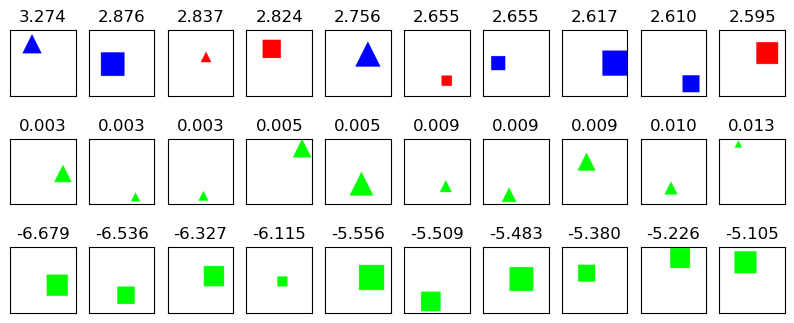

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. that: 0.2906
	2. background: 0.2814
	3. this: 0.2578
	4. canvas: 0.2461
	5. shade: 0.2193
	6. photo: 0.2069
	7. unturn: 0.2034
	8. solid: 0.1919
	9. red: 0.1329
	10. lime: 0.1309
	11. static: 0.1283
	12. the: 0.1196
	13. crimson: 0.0957
	14. shape: 0.0920
	15. transparent: 0.0883
	16. right: 0.0747
	17. white: 0.0664
	18. bottom: 0.0565
	19. picture: 0.0531
	20. image: 0.0452
	21. round: 0.0442
	22. left: 0.0431
	23. green: 0.0421
	24. three: 0.0373
	25. with: 0.0281
	26. outline: 0.0275
	27. scarlet: 0.0180
	28. locate: 0.0150
	29. form: 0.0149
	30. circular: 0.0086
	31. azure: 0.0004
	32. no: 0.0001
	33. cyan: 0.0000
	34. angle: 0.0000
	35. figure: 0.0000
	36. color: 0.0000
	37. rotate: 0.0000
	38. turn: 0.0000
	39. quadratic: 0.0000
	40. blank: 0.0000
	41. olive: 0.0000
	42. fix: 0.0000
	43. up: 0.0000
	

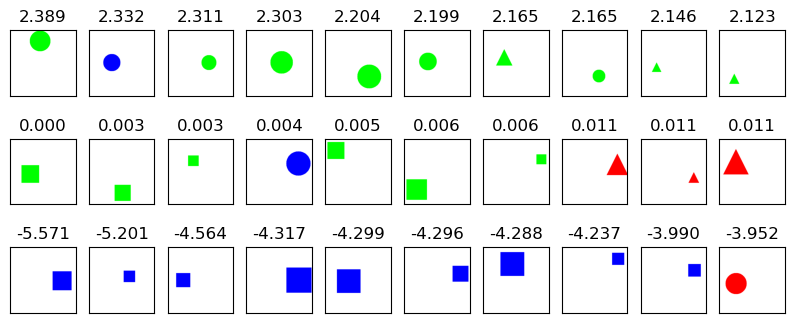

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. blue: 0.7717
	2. color: 0.7000
	3. olive: 0.6721
	4. fix: 0.1391
	5. outline: 0.1069
	6. is: 0.0820
	7. with: 0.0692
	8. turn: 0.0372
	9. triangular: 0.0252
	10. unrotate: 0.0246
	11. position: 0.0152
	12. azure: 0.0122
	13. four: 0.0070
	14. no: 0.0064
	15. locate: 0.0052
	16. corner: 0.0036
	17. in: 0.0032
	18. green: 0.0029
	19. quadratic: 0.0029
	20. have: 0.0027
	21. right: 0.0026
	22. up: 0.0005
	23. white: 0.0004
	24. figure: 0.0000
	25. angle: 0.0000
	26. scarlet: 0.0000
	27. cyan: 0.0000
	28. crimson: 0.0000
	29. lime: 0.0000
	30. red: 0.0000
	31. shade: 0.0000
	32. unturn: 0.0000
	33. <pad>: 0.0000
	34. static: 0.0000
	35. circular: 0.0000
	36. rotate: 0.0000
	37. blank: 0.0000
	38. solid: 0.0000
	39. the: 0.0000
	40. picture: 0.0000
	41. left: 0.0000
	42. canvas: 0.0000
	43. bottom: 0.0000
	44. t

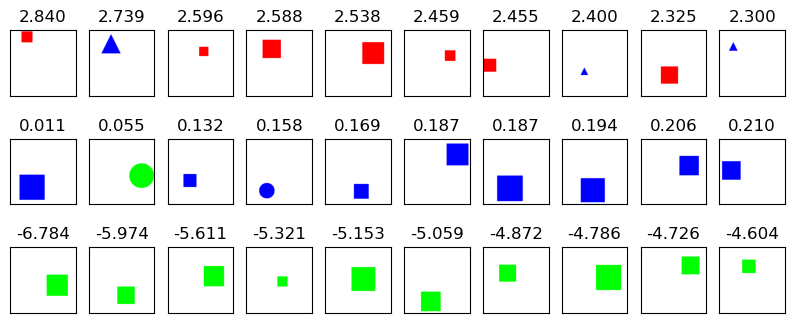

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.1574
	2. four: 0.1479
	3. quadratic: 0.1294
	4. with: 0.0550
	5. no: 0.0130
	6. azure: 0.0110
	7. corner: 0.0090
	8. static: 0.0068
	9. rotate: 0.0050
	10. unrotate: 0.0044
	11. angle: 0.0022
	12. green: 0.0016
	13. white: 0.0014
	14. right: 0.0004
	15. in: 0.0003
	16. up: 0.0000
	17. picture: 0.0000
	18. blank: 0.0000
	19. locate: 0.0000
	20. turn: 0.0000
	21. outline: 0.0000
	22. circular: 0.0000
	23. round: 0.0000
	24. have: 0.0000
	25. three: 0.0000
	26. <pad>: 0.0000
	27. solid: 0.0000
	28. fix: 0.0000
	29. scarlet: 0.0000
	30. red: 0.0000
	31. position: 0.0000
	32. left: 0.0000
	33. cyan: 0.0000
	34. this: 0.0000
	35. shape: 0.0000
	36. canvas: 0.0000
	37. blue: 0.0000
	38. lime: 0.0000
	39. unturn: 0.0000
	40. figure: 0.0000
	41. the: 0.0000
	42. crimson: 0.0000
	43. bottom: 0.0000
	44.

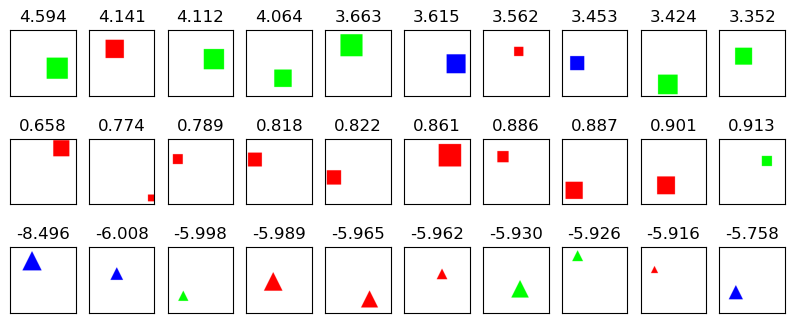

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. image: 0.2914
	2. picture: 0.2450
	3. three: 0.2423
	4. in: 0.2298
	5. rotate: 0.2256
	6. scarlet: 0.2100
	7. transparent: 0.1838
	8. static: 0.1693
	9. angle: 0.1620
	10. red: 0.1285
	11. corner: 0.1246
	12. solid: 0.1175
	13. outline: 0.1131
	14. left: 0.1088
	15. photo: 0.1020
	16. crimson: 0.0988
	17. turn: 0.0935
	18. right: 0.0902
	19. the: 0.0743
	20. unturn: 0.0709
	21. canvas: 0.0645
	22. is: 0.0598
	23. shade: 0.0541
	24. locate: 0.0504
	25. fix: 0.0366
	26. azure: 0.0280
	27. with: 0.0275
	28. background: 0.0266
	29. position: 0.0232
	30. green: 0.0185
	31. white: 0.0184
	32. olive: 0.0147
	33. form: 0.0143
	34. this: 0.0129
	35. unrotate: 0.0080
	36. round: 0.0072
	37. quadratic: 0.0059
	38. have: 0.0058
	39. bottom: 0.0041
	40. four: 0.0039
	41. shape: 0.0021
	42. triangular: 0.0006
	43. up: 0.

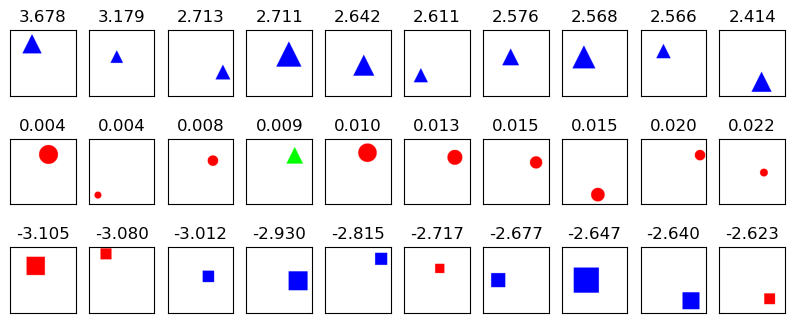

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. white: 0.3395
	2. outline: 0.1695
	3. with: 0.0919
	4. green: 0.0819
	5. lime: 0.0812
	6. right: 0.0563
	7. locate: 0.0286
	8. static: 0.0097
	9. bottom: 0.0094
	10. this: 0.0068
	11. unturn: 0.0006
	12. canvas: 0.0002
	13. angle: 0.0000
	14. left: 0.0000
	15. quadratic: 0.0000
	16. azure: 0.0000
	17. no: 0.0000
	18. blank: 0.0000
	19. circular: 0.0000
	20. transparent: 0.0000
	21. triangular: 0.0000
	22. blue: 0.0000
	23. cyan: 0.0000
	24. crimson: 0.0000
	25. scarlet: 0.0000
	26. <pad>: 0.0000
	27. position: 0.0000
	28. olive: 0.0000
	29. red: 0.0000
	30. have: 0.0000
	31. up: 0.0000
	32. rotate: 0.0000
	33. fix: 0.0000
	34. turn: 0.0000
	35. figure: 0.0000
	36. the: 0.0000
	37. picture: 0.0000
	38. that: 0.0000
	39. form: 0.0000
	40. solid: 0.0000
	41. background: 0.0000
	42. color: 0.0000
	43. shade: 0.

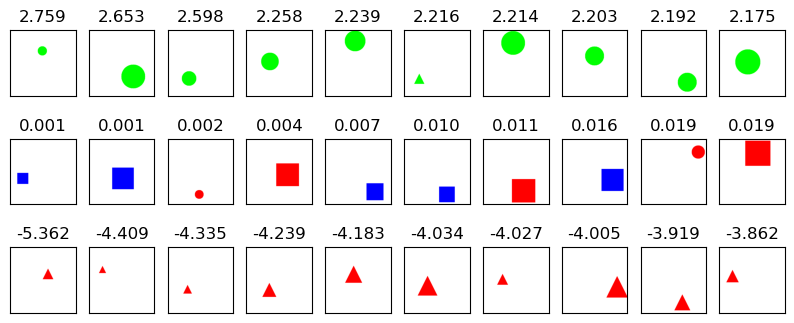

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.3476
	2. four: 0.2406
	3. up: 0.2314
	4. blank: 0.2018
	5. position: 0.1957
	6. angle: 0.1688
	7. figure: 0.1576
	8. unrotate: 0.1506
	9. quadratic: 0.1451
	10. fix: 0.1391
	11. corner: 0.1344
	12. shape: 0.1247
	13. no: 0.0880
	14. form: 0.0805
	15. circular: 0.0796
	16. the: 0.0748
	17. locate: 0.0576
	18. bottom: 0.0556
	19. with: 0.0497
	20. left: 0.0455
	21. is: 0.0448
	22. right: 0.0344
	23. transparent: 0.0290
	24. crimson: 0.0204
	25. in: 0.0126
	26. color: 0.0120
	27. static: 0.0107
	28. white: 0.0087
	29. green: 0.0064
	30. azure: 0.0060
	31. picture: 0.0056
	32. rotate: 0.0033
	33. scarlet: 0.0032
	34. turn: 0.0029
	35. cyan: 0.0013
	36. have: 0.0009
	37. round: 0.0000
	38. outline: 0.0000
	39. that: 0.0000
	40. unturn: 0.0000
	41. <pad>: 0.0000
	42. olive: 0.0000
	43. red: 0.0000
	

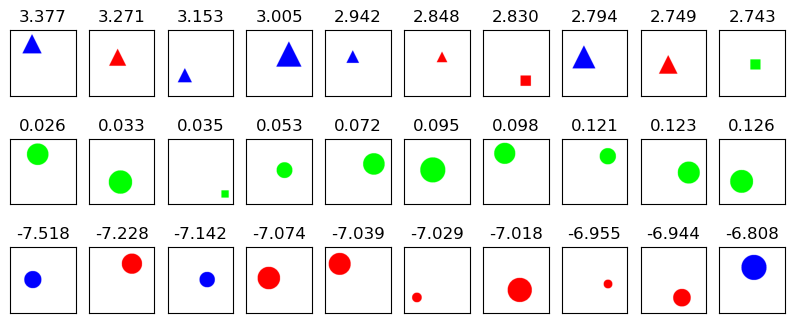

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. no: 0.1464
	2. cyan: 0.1251
	3. have: 0.1180
	4. azure: 0.1009
	5. crimson: 0.0885
	6. with: 0.0725
	7. outline: 0.0475
	8. green: 0.0224
	9. is: 0.0132
	10. right: 0.0077
	11. the: 0.0073
	12. lime: 0.0039
	13. form: 0.0032
	14. locate: 0.0019
	15. bottom: 0.0011
	16. shape: 0.0006
	17. static: 0.0002
	18. four: 0.0001
	19. unturn: 0.0001
	20. circular: 0.0000
	21. quadratic: 0.0000
	22. triangular: 0.0000
	23. blue: 0.0000
	24. red: 0.0000
	25. scarlet: 0.0000
	26. olive: 0.0000
	27. <pad>: 0.0000
	28. position: 0.0000
	29. rotate: 0.0000
	30. white: 0.0000
	31. image: 0.0000
	32. picture: 0.0000
	33. background: 0.0000
	34. left: 0.0000
	35. that: 0.0000
	36. transparent: 0.0000
	37. up: 0.0000
	38. round: 0.0000
	39. unrotate: 0.0000
	40. figure: 0.0000
	41. this: 0.0000
	42. color: 0.0000
	43. turn: 0.

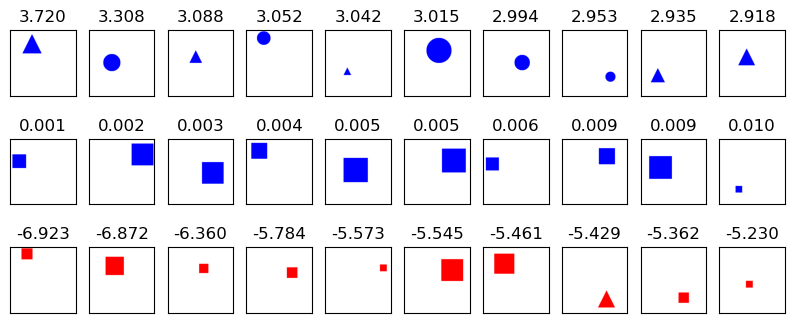

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. round: 0.2561
	2. circular: 0.2326
	3. form: 0.2116
	4. is: 0.2034
	5. bottom: 0.1856
	6. no: 0.1821
	7. locate: 0.1752
	8. left: 0.1508
	9. figure: 0.1494
	10. position: 0.1493
	11. fix: 0.1244
	12. white: 0.1152
	13. blank: 0.1123
	14. shape: 0.1084
	15. right: 0.0893
	16. up: 0.0723
	17. crimson: 0.0703
	18. with: 0.0505
	19. color: 0.0500
	20. red: 0.0448
	21. the: 0.0338
	22. angle: 0.0210
	23. lime: 0.0173
	24. four: 0.0155
	25. triangular: 0.0153
	26. canvas: 0.0139
	27. outline: 0.0138
	28. solid: 0.0069
	29. image: 0.0050
	30. unturn: 0.0043
	31. shade: 0.0029
	32. static: 0.0028
	33. transparent: 0.0026
	34. photo: 0.0007
	35. background: 0.0002
	36. picture: 0.0001
	37. have: 0.0000
	38. three: 0.0000
	39. this: 0.0000
	40. olive: 0.0000
	41. unrotate: 0.0000
	42. blue: 0.0000
	43. azure: 0.0000


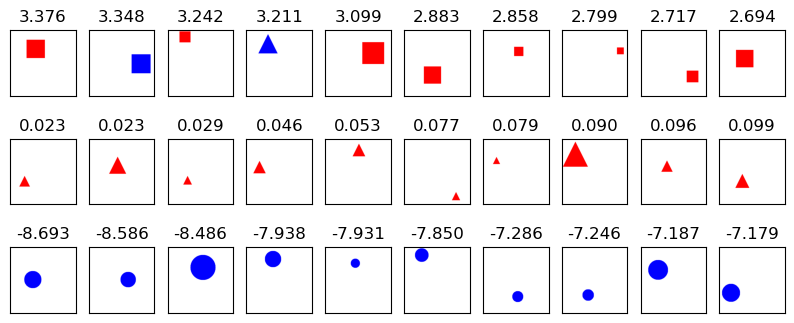

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. have: 0.5196
	2. cyan: 0.4517
	3. azure: 0.4314
	4. turn: 0.4030
	5. quadratic: 0.3852
	6. unrotate: 0.3241
	7. green: 0.2420
	8. rotate: 0.1952
	9. scarlet: 0.1642
	10. in: 0.1487
	11. corner: 0.1453
	12. olive: 0.0862
	13. outline: 0.0829
	14. picture: 0.0771
	15. the: 0.0625
	16. lime: 0.0577
	17. angle: 0.0480
	18. transparent: 0.0452
	19. with: 0.0319
	20. crimson: 0.0208
	21. three: 0.0186
	22. four: 0.0166
	23. right: 0.0137
	24. up: 0.0076
	25. locate: 0.0066
	26. triangular: 0.0000
	27. circular: 0.0000
	28. blue: 0.0000
	29. red: 0.0000
	30. static: 0.0000
	31. unturn: 0.0000
	32. fix: 0.0000
	33. position: 0.0000
	34. is: 0.0000
	35. <pad>: 0.0000
	36. white: 0.0000
	37. image: 0.0000
	38. solid: 0.0000
	39. shape: 0.0000
	40. this: 0.0000
	41. that: 0.0000
	42. form: 0.0000
	43. color: 0.0000
	

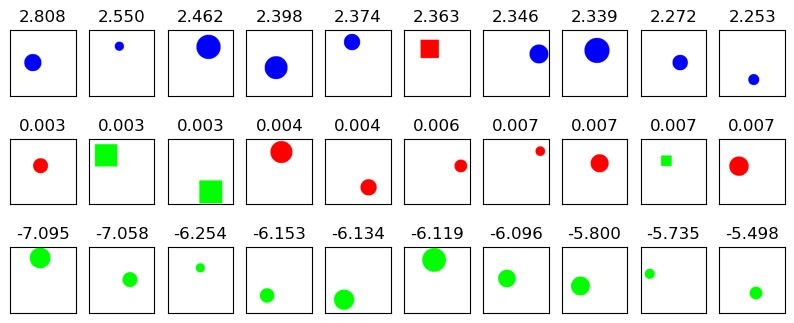

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. up: 0.1898
	2. figure: 0.1369
	3. blank: 0.1219
	4. four: 0.0903
	5. form: 0.0829
	6. lime: 0.0790
	7. green: 0.0648
	8. no: 0.0608
	9. with: 0.0571
	10. locate: 0.0567
	11. bottom: 0.0564
	12. shape: 0.0551
	13. the: 0.0523
	14. cyan: 0.0380
	15. position: 0.0369
	16. unrotate: 0.0290
	17. triangular: 0.0129
	18. azure: 0.0081
	19. right: 0.0053
	20. have: 0.0038
	21. fix: 0.0014
	22. white: 0.0008
	23. circular: 0.0008
	24. color: 0.0008
	25. left: 0.0001
	26. quadratic: 0.0000
	27. this: 0.0000
	28. round: 0.0000
	29. transparent: 0.0000
	30. outline: 0.0000
	31. olive: 0.0000
	32. crimson: 0.0000
	33. red: 0.0000
	34. <pad>: 0.0000
	35. blue: 0.0000
	36. that: 0.0000
	37. scarlet: 0.0000
	38. solid: 0.0000
	39. is: 0.0000
	40. unturn: 0.0000
	41. static: 0.0000
	42. rotate: 0.0000
	43. background: 0.00

IndexError: list index out of range

In [5]:
for i in range(51):
    visualize_concept(i)